In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


1. handling missing values

In [5]:
#1. handling missing values

#numerical variables
#to fill values usig library
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy="mean")
#fill age with mean of age and etc
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

#cartegorical variables (based on mode)
categorical_cols = df.select_dtypes(include=["object"]).columns
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

#removing unecessary feature
#Remove Applicant ID
df = df.drop("Applicant_ID", axis=1)

2. EDA

Text(0.5, 1.0, 'Is Loan approved or not?')

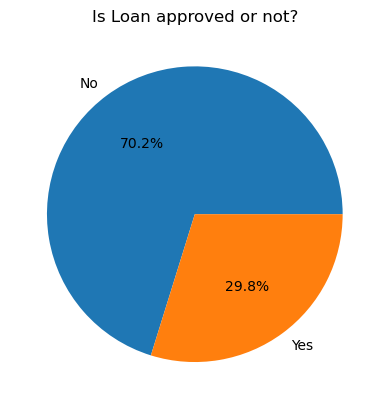

In [7]:
#how balanced our classes are?
classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is Loan approved or not?")


[Text(0, 0, '621'), Text(0, 0, '379')]

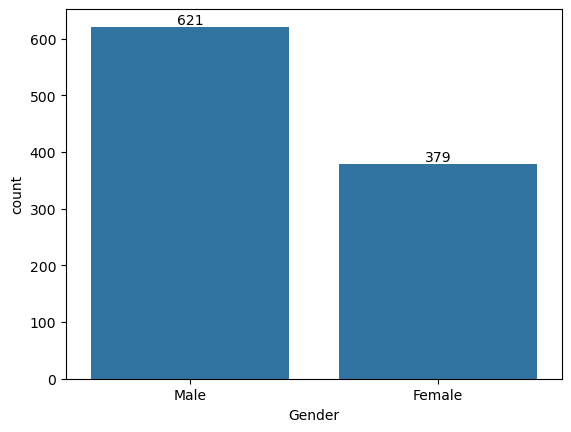

In [8]:
#analyse categories
gender_cnt= df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

In [9]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


<Axes: xlabel='Applicant_Income', ylabel='Count'>

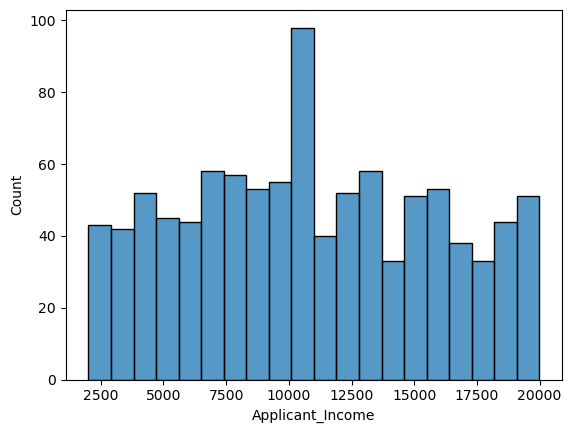

In [10]:
#analyse income -logically thinking
sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins =20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

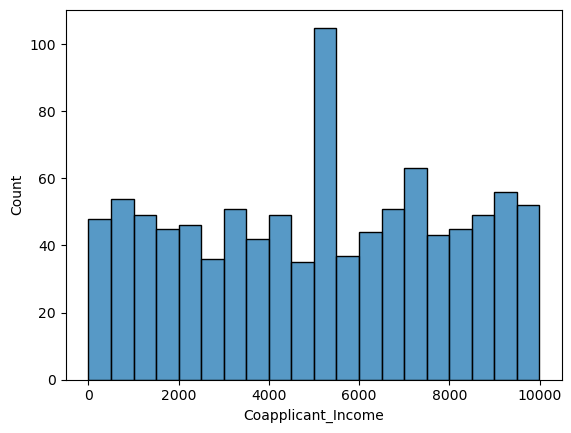

In [11]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins =20
)

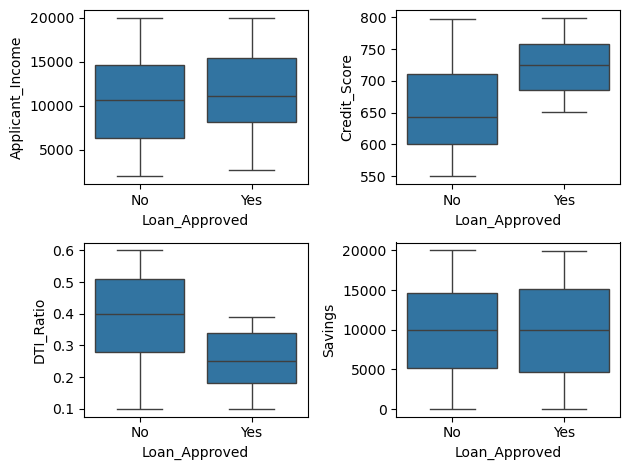

In [12]:
#detecing outliers
fig, axes = plt.subplots(2,2)
sns.boxplot(ax=axes[0,0], data=df, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax=axes[0,1], data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1,0], data=df, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax=axes[1,1], data=df, x="Loan_Approved", y="Savings")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

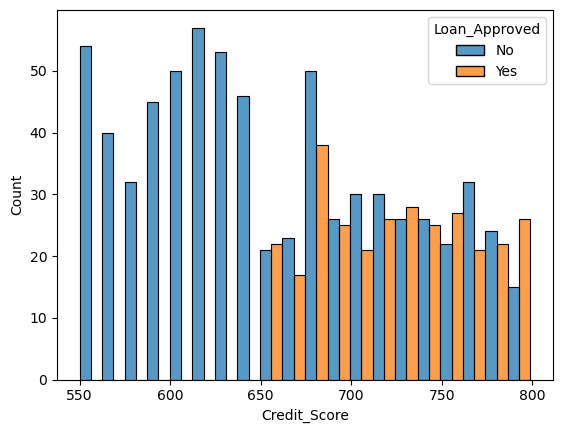

In [13]:
#connecting between features with output
#credit score wth loan approved
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)



3. Feature Encoding

In [14]:
#enconding categroical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#label encoder
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

#one hot encoder
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose",
        "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

# Correlation Heatmap

In [17]:
nums_cols = df.select_dtypes(include = "number")
corr_matrix = nums_cols.corr()

In [18]:
#would like to see the relatonship with the target 
nums_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

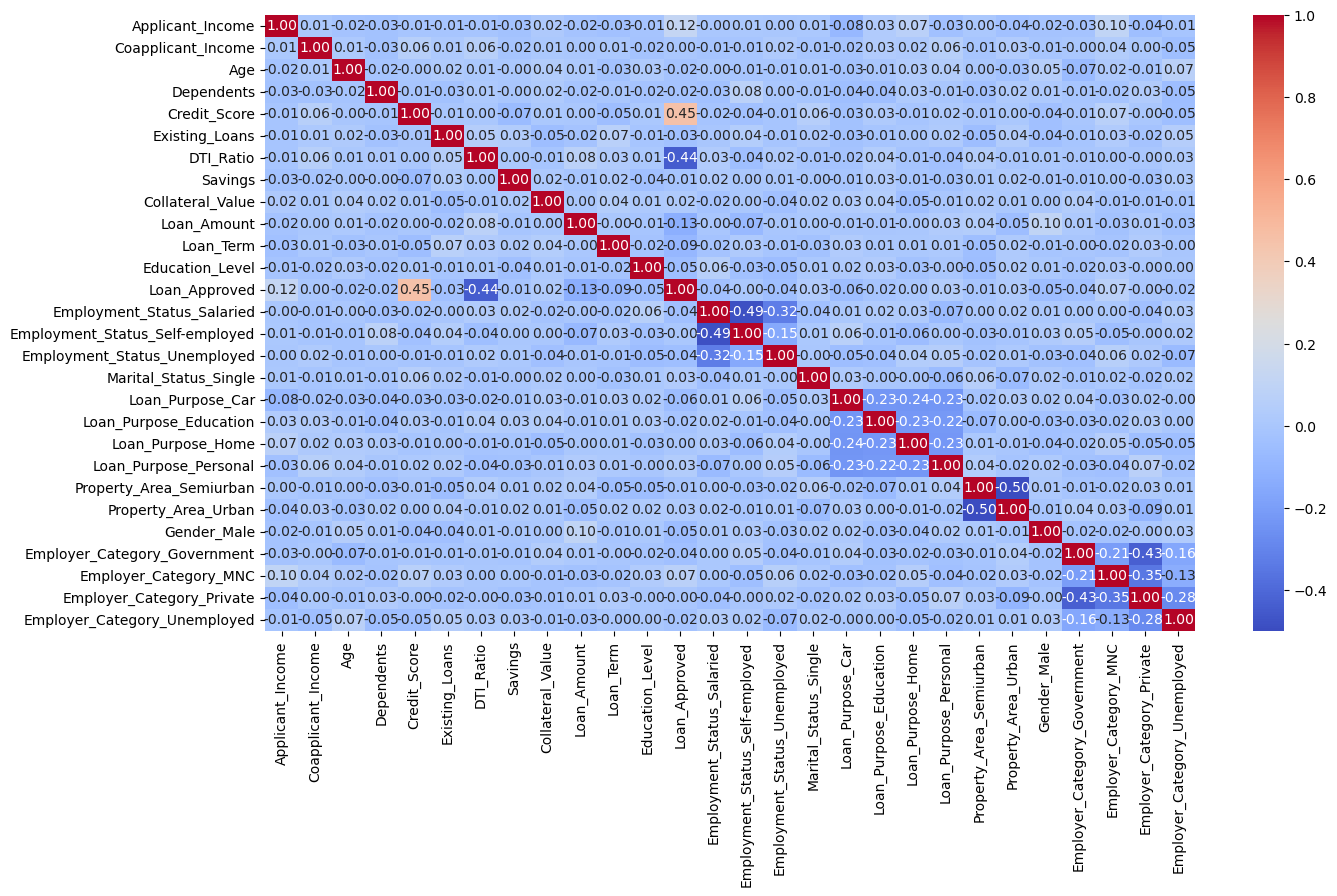

In [19]:
#we show the above using heat map 
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
    

# Train-Test-SPlit + feature scaling


In [20]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]


In [21]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]])

Train & Evaluate Models

In [26]:
#the problems statments says we need to:
#1. reduce high-risk customers that gets approved therefore we trying to minimise false positive (FP)
#(we use the parameter Precision for this)
#2. good customers that gets rejected therefore we trying to minimise False negative (FN)
#(we used the parameter Recall for this)
#thus precision is important then it will be recall and then f1-score (its used to keep balance)
#logistic Regressoion 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

#evaluation 
print("logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))
      

logistic Regression Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1_score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


In [27]:
#KNN  
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

#evaluation 
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))
      

KNN Model
Precision:  0.6274509803921569
Recall:  0.5245901639344263
F1_score:  0.5714285714285714
Accuracy:  0.76
CM:  [[120  19]
 [ 29  32]]


In [28]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

#evaluation 
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))
      

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1_score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


Best model on the basis of precision => Naive Bayes

# Feature Engineering

In [29]:
#CREDIT-SCORE DTI-RATION STOOD OUT BASED ON HEATMAP
#we can increase the impract of these features

#converting these features into polynomial features
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"]  = df["Credit_Score"] ** 2


X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y= df["Loan_Approved"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#logistic Regressoion 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

#evaluation 
print("logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1_score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [31]:
#KNN  
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

#evaluation 
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.62
Recall:  0.5081967213114754
F1_score:  0.5585585585585585
Accuracy:  0.755
CM:  [[120  19]
 [ 30  31]]


In [32]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

#evaluation 
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1_score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]


# Naive Bayes is still the best model in terms of precision. logistic regression is the second best (improved after feature engineering - to keep balance (F1-score) then choose logistic regression))